<a href="https://colab.research.google.com/github/mukheshbabu/machine-learning/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("pima-indians-diabetes.csv", header=None, names=col_names, skiprows=1)  # Skip the first row

pima.head(10)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [10]:
# Selecting Features

# split dataset in features and target variables
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
X = pima[feature_cols]
y = pima.label

In [11]:
# Splitting data

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

# 75% data will be used for model training and 25% for model testing

In [12]:
# Model development and prediction

# import the class
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# Imputation to handle NaN values
imputer = SimpleImputer(strategy='mean')  # Replace NaN with the mean of the column
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Scale training data
X_test = scaler.transform(X_test) # Scale testing data using the same scaler

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [13]:
# Model Evaluation using Confusion Matrix

# import the metric class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[115,  10],
       [ 25,  42]])

Text(0.5, 257.44, 'Predicted label')

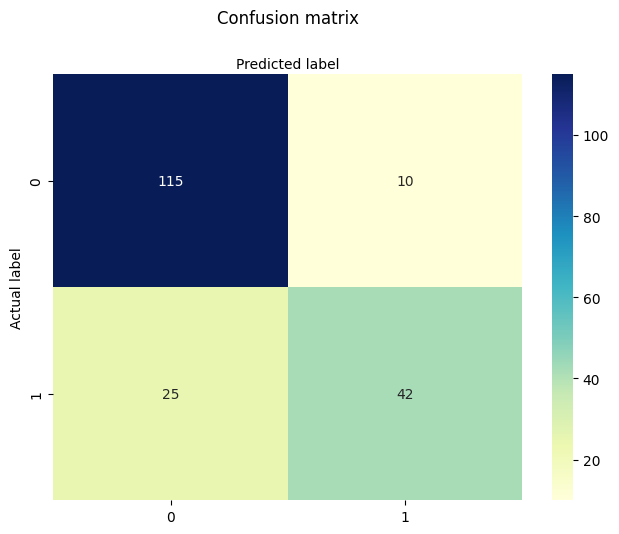

In [15]:
# Visualizing confusion matrix using a heatmap

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.text import Text

class_names = [0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 257.44, 'Predicted label')

In [16]:
# Confusion matrix evaluation metrics

from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.92      0.87       125
   with diabetes       0.81      0.63      0.71        67

        accuracy                           0.82       192
       macro avg       0.81      0.77      0.79       192
    weighted avg       0.82      0.82      0.81       192



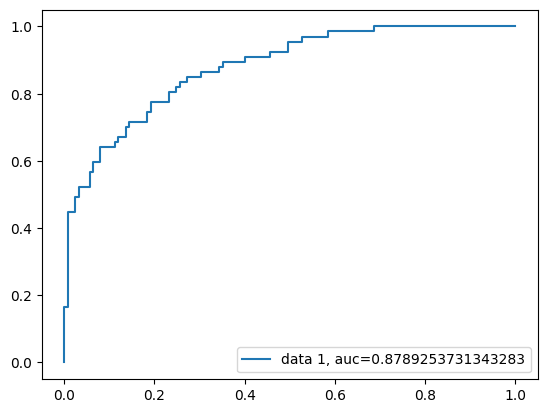

In [17]:
# ROC Curve (Receiver Operating Characterisitc) curve

y_pred_proba = logreg.predict_proba(X_test)[::,1]
# convert y_test to numeric type if it's not already
y_test_numeric = pd.to_numeric(y_test, errors='coerce')
# Replace infinite values with NaN
y_test_numeric = y_test_numeric.replace([np.inf, -np.inf], np.nan)
# Remove rows with NaN values
mask = np.isfinite(y_test_numeric)
y_test_numeric = y_test_numeric[mask]
y_pred_proba = y_pred_proba[mask]

fpr, tpr, _ = metrics.roc_curve(y_test_numeric, y_pred_proba)
auc = metrics.roc_auc_score(y_test_numeric, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()